## Regional tropical cyclone impact functions

### CITATION
Eberenz S, Lüthi S, Bresch DN. Regional tropical cyclone impact functions for globally consistent risk assessments. Natural Hazards and Earth System Sciences. 2021 Jan 29;21(1):393-415.

### LINK
https://nhess.copernicus.org/articles/21/393/2021/

### NOTES
The data is used to provide a 'generic asset' vulnerability distribution. The fitted results are copied into Table_A2_Impact_Function_Slope.csv. 
(a) the global default impact function (uncalibrated), (b) calibrated by optimizing RMSF, and (c) calibrated by optimizing TDR. The regions NA1 to WP4 are defined in Table A1. The row “combined” summarizes results for all regions combined based on the regionalized calibration; the row “global calibration” is based on one unified global calibration based on all matched TC 473 events. RMSF: root-mean-squared fraction; TDR: total damage ratio.



In [11]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Table_A2_Impact_Function_Slope.csv")
region = df["region"].to_numpy()
v_half_by_region = df["vhalf_b"].to_numpy()
print(region)
print(v_half_by_region)

['NA1' 'NA2' 'NI' 'OC' 'SI' 'WP1' 'WP2' 'WP3' 'WP4' 'Combined'
 'Global calibration']
['59.6' '86' '58.7' '49.7' '46.8' '56.7' '84.7' '80.2' '135.6' '–' '73.4']


[ 50.55 188.1 ]


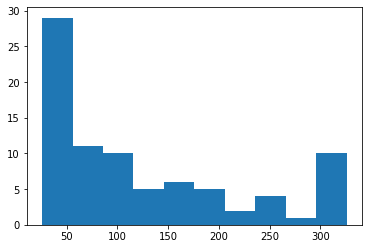

In [12]:
df = pd.read_csv("Table_S2_V_half_individual_fitting_per_event.csv")
v_half = df[df.region == "WP2"]["v_half_fitted [m/s]"]

import matplotlib.pyplot as plot

plot.hist(v_half)
print(np.quantile(v_half, [0.25, 0.75]))

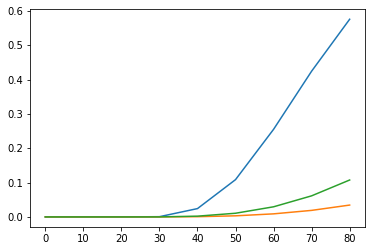

In [1]:
def vul(v, v_half):
    v_thresh = 25.7
    # v_half = 135.6 # wp4 74.7 135.6 190.5
    vn = np.where(v > v_thresh, v - v_thresh, 0) / (v_half - v_thresh)
    f = vn**3 / (1 + vn**3)
    return f


v = np.arange(0, 90, 10)
fig, ax = plt.subplots()
# for item in v_half.to_numpy():
#    ax.plot(v, vul(v, item))
ax.plot(v, vul(v, 74.7))
ax.plot(v, vul(v, 190.5))
ax.plot(v, vul(v, 135.6))